## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2020-11-10 14:17:54--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2020-11-10 14:17:55--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucabf383b233f79ae4aeff96545e.dl.dropboxusercontent.com/cd/0/inline/BC4MsgBl79WnE_Jgo_EwBiB4Iozlug9TG2T4SZUQZNx1uZzcVEg_gC7zlRPyVaXz0vsQHDS0yLYUhToX-g8-SG0CsbyYeU0lpTmoXwUQVFCbqT0vND5eqttL0enWAJ9yN3Q/file# [following]
--2020-11-10 14:17:55--  https://ucabf383b233f79ae4aeff96545e.dl.dropboxusercontent.com/cd/0/inline/BC4MsgBl79WnE_Jgo_EwBiB4Iozlug9TG2T4SZUQZNx

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [5]:
#Importing pandas dataframe with a random number of rows between 10k and full size
df=pd.read_csv("/home/filippo/data/data_000637.txt").head(np.random.randint(10000,1310720))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
374713,1,1,8,3869203930,1893,20
374714,1,0,60,3869203930,1903,15
374715,1,1,139,3869203930,1903,0
374716,1,1,5,3869203930,1901,4


In [6]:
#Finding x as the maximum number that "BX_COUNTER" can reach and adding 1
x=df["BX_COUNTER"].max()+1
x

3564

In [9]:
#Calculating time needed to take data multiplying each counter for his time correspondent
dftot=pd.read_csv("/home/filippo/data/data_000637.txt")
time=(dftot["ORBIT_CNT"].max()-dftot["ORBIT_CNT"].min())*x*(25e-9)+float(df["BX_COUNTER"].tail(1))*(25e-9)*float(df["TDC_MEAS"].tail(1))*((25./30)*1e-9)
print(time)

0.9804564


In [10]:
#Adding a new column calculating for each count his correspondent time increase
df["ABStime"]=(df["ORBIT_CNT"]-df["ORBIT_CNT"].min())*x*(25e-9)+df["BX_COUNTER"]*(25e-9)*df["TDC_MEAS"]*((25./30)*1e-9)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABStime
0,1,0,123,3869200167,2374,26,1.285917e-12
1,1,0,124,3869200167,2374,27,1.335375e-12
2,1,0,63,3869200167,2553,28,1.489250e-12
3,1,0,64,3869200167,2558,19,1.012542e-12
4,1,0,64,3869200167,2760,25,1.437500e-12
...,...,...,...,...,...,...,...
374713,1,1,8,3869203930,1893,20,3.352833e-01
374714,1,0,60,3869203930,1903,15,3.352833e-01
374715,1,1,139,3869203930,1903,0,3.352833e-01
374716,1,1,5,3869203930,1901,4,3.352833e-01


In [76]:
#Replacing the "HEAD" column using a list of random generated numbers
df["HEAD"]=np.random.randint(0,2,len(df))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,0,0,123,3869200167,2374,26,1.285917e-12
1,0,0,124,3869200167,2374,27,1.335375e-12
2,1,0,63,3869200167,2553,28,1.489250e-12
3,0,0,64,3869200167,2558,19,1.012542e-12
4,1,0,64,3869200167,2760,25,1.437500e-12
...,...,...,...,...,...,...,...
179906,0,1,8,3869201957,1501,1,1.594890e-01
179907,0,0,54,3869201957,1508,1,1.594890e-01
179908,0,0,51,3869201957,1509,11,1.594890e-01
179909,0,1,10,3869201957,1553,19,1.594890e-01


In [11]:
#Creating a new dataframe with all the rows equal to one
dfones=df[df["HEAD"]==1]
dfones

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABStime
0,1,0,123,3869200167,2374,26,1.285917e-12
1,1,0,124,3869200167,2374,27,1.335375e-12
2,1,0,63,3869200167,2553,28,1.489250e-12
3,1,0,64,3869200167,2558,19,1.012542e-12
4,1,0,64,3869200167,2760,25,1.437500e-12
...,...,...,...,...,...,...,...
374713,1,1,8,3869203930,1893,20,3.352833e-01
374714,1,0,60,3869203930,1903,15,3.352833e-01
374715,1,1,139,3869203930,1903,0,3.352833e-01
374716,1,1,5,3869203930,1901,4,3.352833e-01


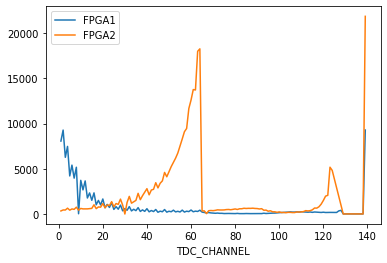

In [13]:
#Plotting the two different occupation for the various channels
df[df["FPGA"]==1].groupby(["TDC_CHANNEL"]).count()["HEAD"].plot()
df[df["FPGA"]==0].groupby(["TDC_CHANNEL"]).count()["HEAD"].plot()
plt.legend(["FPGA1","FPGA2"])

In [22]:
#Printing the tot 3 channels with the highest number of counts
df.groupby("TDC_CHANNEL").count().sort_values(by="HEAD",ascending=False)["HEAD"].head(3)

TDC_CHANNEL
139    31164
64     18699
63     18290
Name: HEAD, dtype: int64

In [25]:
#Printing the number of unique ORBITS
print(df["ORBIT_CNT"].nunique())
#Printing the number of unique ORBITS with at least one count from channel 139
print(df[df["TDC_CHANNEL"]==139]["ORBIT_CNT"].nunique())

3761
3752
